In [1]:
from scorecard import Scorecard
import time
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

## appendicitis
7 medical measures taken over 106 patients on which the class label represents if the patient has appendicitis (class label 1) or not (class label 0).

In [ ]:
with open('datasets/appendicitis.dat', "r") as file:
    lines = file.readlines()

data_start_ind = lines.index("@data\n") + 1
app_data = lines[data_start_ind:]
app_data = pd.read_csv(StringIO("".join(app_data)), header=None)

app_data.columns = ["At1", "At2", "At3", "At4", "At5", "At6", "At7", "Class"]

app_X = app_data.iloc[:, :-1]
app_y = app_data.iloc[:, -1]

print("num observations: ", app_y.count())
print("target distribution: ", app_y.value_counts())


app_X.describe()


In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='RSS')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [ ]:
'''from scorecard import Scorecard
import time

start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, 
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
scorecard.cross_val_score()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")'''

In [ ]:
categorical_columns = app_X.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    app_X[col] = app_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {app_X[col].unique()}")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='MM')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_1ook_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='BEYOND_L1')
_, caim_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_1ook_ml_model, app_infbins_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=13)
_, infbins_accuracy = scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
scorecard.plot_accuracy_vs_sparsity(caim_accuracy, num_nonzero_weights, infbins_accuracy, scorecard.nonzero_weights.shape[0])

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_caim_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
app_infbins_diff_ml_model, app_caim_1ook_ml_weights = scorecard.fit(app_X, app_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mammo
discrimination of benign and malignant mammographic masses based on BI-RADS attributes and the patient's age.

https://archive.ics.uci.edu/dataset/161/mammographic+mass

In [ ]:
# fetch dataset 
mammo_data = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
mammo_X = mammo_data.data.features 
mammo_y = mammo_data.data.targets 

print("num observations: ", mammo_y.count())

# drop rows with nulls
mammo_combined = pd.concat([mammo_X, mammo_y], axis=1)
print("num rows with nulls: ", mammo_combined.isnull().sum().sum())
mammo_combined = mammo_combined.dropna()
mammo_combined = mammo_combined.reset_index(drop=True)
mammo_X = mammo_combined.iloc[:, :-1]
mammo_y = mammo_combined.iloc[:, -1]


# metadata 
# print(mammo_data.metadata) 
  
# variable information 
# print(mammo_data.variables) 

print("num observations: ", mammo_y.count())
print("target distribution: ", mammo_y.value_counts())

mammo_X.describe()

# proportion of positive class
print("Proportion of positive class: ", mammo_y.mean())

In [ ]:
categorical_columns = mammo_X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mammo_X[col] = mammo_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mammo_X[col].unique()}")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params= {'C': 1000.0, 'class_weight': None})
                
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 0.25, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.04641588833612782})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 1000.0, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 0.25, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
mammo_caim_1ook_ml_model, mammo_caim_1ook_ml_weights = scorecard.fit(mammo_X, mammo_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.04641588833612782})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## aesthetic evaluation (binary version)

comparar com scorecard 'objective evaluation'!!!!

In [ ]:
aesthetic_evaluation_data = pd.read_csv('datasets/aesthetic_evaluation_data.csv')
aesthetic_evaluation_data = aesthetic_evaluation_data.drop(columns=['Image Filename','Author','Objective Evaluation', 'sX2L Value','sX2a Value','sX2b Value','sX2Lab Value','sEMDL Value','sEMDa Value','sEMDb Value','sEMDLab Value'])
aesthetic_evaluation_X = aesthetic_evaluation_data.drop(columns='Subjective Evaluation')
aesthetic_evaluation_y = aesthetic_evaluation_data['Subjective Evaluation']

aesthetic_evaluation_data.head()

In [ ]:
aesthetic_evaluation_y.value_counts()

In [ ]:
# create binary target from aesthetic evaluation, by joining good and excellent, and fair and poor
aesthetic_evaluation_binary_y = aesthetic_evaluation_y.map({'Excellent': 1, 'Good': 1, 'Fair': 0, 'Poor': 0})

# distribution
print(aesthetic_evaluation_binary_y.value_counts())

# proportion of positive class
print("Proportion of positive class: ", aesthetic_evaluation_binary_y.mean())

In [ ]:
categorical_columns = aesthetic_evaluation_X.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_columns}')

# encode categorical columns
for col in categorical_columns:
    aesthetic_evaluation_X[col] = aesthetic_evaluation_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {aesthetic_evaluation_X[col].unique()}")


In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_1ook_ml_model, aesthetic_binary_caim_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 1000.0, 'class_weight': None})
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_1ook_ml_model, aesthetic_binary_infbins_1ook_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_caim_diff_ml_model, aesthetic_binary_caim_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
aesthetic_binary_infbins_diff_ml_model, aesthetic_binary_infbins_diff_ml_weights = scorecard.fit(aesthetic_evaluation_X, aesthetic_evaluation_binary_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## income
predict whether annual income of an individual exceeds $50K/yr based on census data

https://archive.ics.uci.edu/dataset/2/adult

In [ ]:
# fetch dataset 
adult_data = fetch_ucirepo(id=2) 
  
# check for nulls

# data (as pandas dataframes) 
adult_X = adult_data.data.features 
adult_y = adult_data.data.targets
adult_y.loc[:,'income'] = adult_y['income'].map({'>50K': 1, '<=50K': 0})


# substitute '?' with NaN
adult_X = adult_X.replace('?', pd.NA)
adult_y = adult_y.replace('?', pd.NA)

# drop rows with nulls
adult_combined = pd.concat([adult_X, adult_y], axis=1)
print("num rows with nulls: ", adult_combined.isnull().sum().sum())
adult_combined = adult_combined.dropna()
adult_combined = adult_combined.reset_index(drop=True)
adult_X = adult_combined.iloc[:, :-1]
adult_y = adult_combined.iloc[:, -1]

# metadata 
# print(adult_data.metadata) 
  
# variable information 
# print(adult_data.variables) 

# make y be int
adult_y = adult_y.astype(int)

print("num observations: ", adult_y.count())
print("num features: ", adult_X.shape[1])
print("target distribution: ", adult_y.value_counts())
adult_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (<=50K)', '1 (>50K)'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", adult_y.mean())

In [ ]:
# get type of each column
print("types: ", adult_X.dtypes)

# show categorical columns
print("\nobject columns: ", adult_X.select_dtypes(include=['object']).columns)
categorical_columns = adult_X.select_dtypes(include=['object']).columns

# show number of unique values in each categorical column
print("\nnumber of unique values in each categorical column: ", adult_X.select_dtypes(include=['object']).nunique())

# show values of all categorical columns
print("\nvalues of all categorical columns: ", adult_X.select_dtypes(include=['object']).apply(lambda x: x.unique()))

In [ ]:
categorical_columns = adult_X.select_dtypes(include=['object']).columns.tolist()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    adult_X[col] = adult_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {adult_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': 2.5, 'class_weight': None})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")  

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.0002782559402207126})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
alpha = 0.6
C = 1 / alpha
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'C': C, 'class_weight': None})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='MM')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='BEYOND_L1')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
adult_caim_1ook_ml_model, adult_caim_1ook_ml_weights = scorecard.fit(adult_X, adult_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ADAPTIVE_LASSO',
                use_sbc=False,
                mapping=None,
                num_nonzero_weights=None,
                show_prints=True,
                params={'alpha': 0.0002782559402207126})
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## mushroom
mushrooms described in terms of physical characteristics; classification: poisonous or edible

https://archive.ics.uci.edu/dataset/73/mushroom

In [ ]:
# fetch dataset 
mushroom_data = fetch_ucirepo(id=73) 

# data (as pandas dataframes) 
mushroom_X = mushroom_data.data.features 
mushroom_y = mushroom_data.data.targets.squeeze().map({'p': 1, 'e': 0}).astype(int)
  
# metadata 
# print(mushroom_data.metadata) 
  
# variable information 
# print(mushroom_data.variables) 

# substitute '?' with NaN and drop rows with nulls
mushroom_combined = pd.concat([mushroom_X, mushroom_y], axis=1)
mushroom_combined = mushroom_combined.replace('?', pd.NA)
print("num rows with nulls: ", mushroom_combined.isnull().sum().sum())
mushroom_combined = mushroom_combined.dropna().reset_index(drop=True)
mushroom_X = mushroom_combined.iloc[:, :-1]
mushroom_y = mushroom_combined.iloc[:, -1]

print("num observations: ", mushroom_y.count())
print("num features: ", mushroom_X.shape[1])
print("target distribution: ", mushroom_y.value_counts())
# show target distribution
mushroom_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Mushroom')
plt.ylabel('Count')
plt.xticks([0, 1], ['Edible', 'Poisonous'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", mushroom_y.mean())

In [ ]:
categorical_columns = mushroom_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    mushroom_X[col] = mushroom_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {mushroom_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_1ook_ml_model, mushroom_caim_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_1ook_ml_model, mushroom_infbins_1ook_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_caim_diff_ml_model, mushroom_caim_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
mushroom_infbins_diff_ml_model, mushroom_infbins_diff_ml_weights = scorecard.fit(mushroom_X, mushroom_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## spambase
classifying Email as Spam or Non-Spam

https://archive.ics.uci.edu/dataset/94/spambase

In [ ]:
# fetch dataset 
spambase_data = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
spambase_X = spambase_data.data.features 
spambase_y = spambase_data.data.targets 
  
# metadata 
# print(spambase_data.metadata) 
  
# variable information 
# print(spambase_data.variables) 

print("num observations: ", spambase_y.count())
print("num features: ", spambase_X.shape[1])
print("target distribution: ", spambase_y.value_counts())
# show target distribution
spambase_y['Class'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", spambase_y['Class'].mean())

In [ ]:
categorical_columns = spambase_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    spambase_X[col] = spambase_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {spambase_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_caim_1ook_ml_model, spambase_caim_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_infbins_1ook_ml_model, spambase_infbins_1ook_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()
scorecard = Scorecard()
spambase_caim_diff_ml_model, spambase_caim_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
spambase_infbins_diff_ml_model, spambase_infbins_diff_ml_weights = scorecard.fit(spambase_X, spambase_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## advertisements
set of possible advertisements on Internet pages

https://archive.ics.uci.edu/dataset/51/internet+advertisements

In [ ]:
# load dataset from file. target is last column
telemarketing_data = pd.read_csv('datasets/internet+advertisements/ad.data', dtype=str)
telemarketing_X = telemarketing_data.iloc[:, :-1]
telemarketing_y = telemarketing_data.iloc[:, -1]

telemarketing_y = telemarketing_y.map({'nonad.': 0, 'ad.': 1})

#  substitute '   ?' with NaN and drop rows with nulls
telemarketing_combined = pd.concat([telemarketing_X, telemarketing_y], axis=1)
telemarketing_combined = telemarketing_combined.replace('   ?', pd.NA)
print("num rows with nulls: ", telemarketing_combined.isnull().sum().sum())
telemarketing_combined = telemarketing_combined.dropna().reset_index(drop=True)
telemarketing_X = telemarketing_combined.iloc[:, :-1]
telemarketing_y = telemarketing_combined.iloc[:, -1]

print("num observations: ", telemarketing_y.count())
print("num features: ", telemarketing_X.shape[1])
print("target distribution: ", telemarketing_y.value_counts())
# show target distribution
telemarketing_y.value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Telemarketing')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Ad', 'Ad'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", telemarketing_y.mean())

In [ ]:
categorical_columns = telemarketing_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    telemarketing_X[col] = telemarketing_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {telemarketing_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_1ook_ml_model, telemarketing_caim_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_1ook_ml_model, telemarketing_infbins_1ook_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_caim_diff_ml_model, telemarketing_caim_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')

scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
telemarketing_infbins_diff_ml_model, telemarketing_infbins_diff_ml_weights = scorecard.fit(telemarketing_X, telemarketing_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## breast cancer
predict if a breast tumor is malignant or benign

https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

num rows with nulls:  16
num observations:  683
num features:  9
target distribution:  Class
0    444
1    239
Name: count, dtype: int64


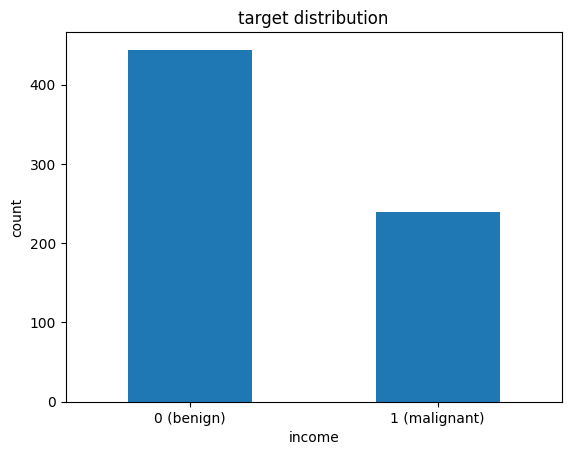

Proportion of positive class:  0.34992679355783307


In [2]:
# fetch dataset 
breast_cancer_data = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
breast_cancer_X = breast_cancer_data.data.features 
breast_cancer_y = breast_cancer_data.data.targets 

breast_cancer_y.loc[:,'Class'] = breast_cancer_y['Class'].map({4: 1, 2: 0})

# drop rows with nulls
breast_cancer_combined = pd.concat([breast_cancer_X, breast_cancer_y], axis=1)
print("num rows with nulls: ", breast_cancer_combined.isnull().sum().sum())
breast_cancer_combined = breast_cancer_combined.dropna()
breast_cancer_combined = breast_cancer_combined.reset_index(drop=True)
breast_cancer_X = breast_cancer_combined.iloc[:, :-1]
breast_cancer_y = breast_cancer_combined.iloc[:, -1]

# metadata 
# print(breast_cancer_data.metadata) 
  
# variable information 
# print(breast_cancer_data.variables) 

print("num observations: ", breast_cancer_y.count())
print("num features: ", breast_cancer_X.shape[1])
print("target distribution: ", breast_cancer_y.value_counts())
breast_cancer_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('income')
plt.ylabel('count')
plt.xticks([0, 1], ['0 (benign)', '1 (malignant)'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", breast_cancer_y.mean())

In [3]:
categorical_columns = breast_cancer_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    breast_cancer_X[col] = breast_cancer_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {breast_cancer_X[col].unique()}")

categorical columns:  []



discretization thresholds
# 0  GLOBAL CAIM  190.53154681139756
# 1  GLOBAL CAIM  226.87936287348333
# 2  GLOBAL CAIM  223.22969965670123
# 3  GLOBAL CAIM  194.36492804663305
# 4  GLOBAL CAIM  205.1057371690095
# 5  GLOBAL CAIM  214.91971933978692
# 6  GLOBAL CAIM  214.80568453892477
# 7  GLOBAL CAIM  204.86383745698836
# 8  GLOBAL CAIM  154.09580372609327

thresholds  {'Clump_thickness': [1.0, 6.0, 10.0], 'Uniformity_of_cell_size': [1.0, 3.0, 10.0], 'Uniformity_of_cell_shape': [1.0, 3.0, 10.0], 'Marginal_adhesion': [1.0, 3.0, 10.0], 'Single_epithelial_cell_size': [1.0, 2.0, 10.0], 'Bare_nuclei': [1.0, 3.0, 10.0], 'Bland_chromatin': [1.0, 3.0, 10.0], 'Normal_nucleoli': [1.0, 2.0, 10.0], 'Mitoses': [1.0, 2.0, 10.0]}
num of bins: 
  Clump_thickness: 4
  Uniformity_of_cell_size: 4
  Uniformity_of_cell_shape: 4
  Marginal_adhesion: 4
  Single_epithelial_cell_size: 4
  Bare_nuclei: 4
  Bland_chromatin: 4
  Normal_nucleoli: 4
  Mitoses: 4

encoding
X_disc shape:  (512, 27)
X_disc columns:  I

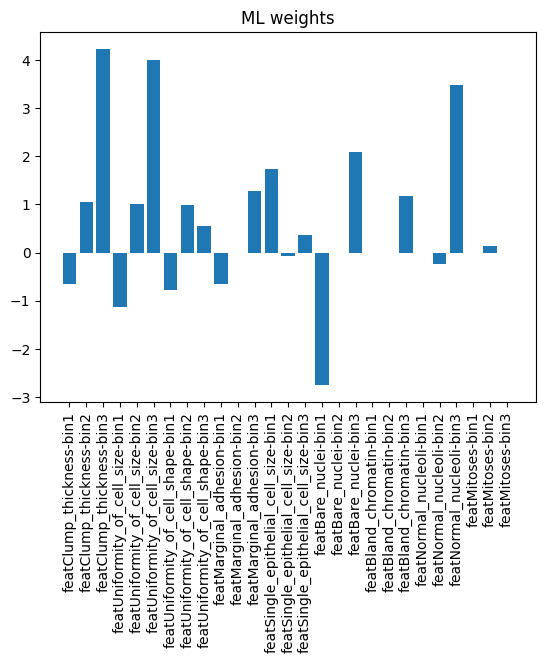

num of zero weights:  7
num of non-zero weights:  20
                                 Feature    Weight
0               featClump_thickness-bin1 -0.658042
1               featClump_thickness-bin2  1.041874
2               featClump_thickness-bin3  4.225966
3       featUniformity_of_cell_size-bin1 -1.133842
4       featUniformity_of_cell_size-bin2  1.013811
5       featUniformity_of_cell_size-bin3  3.988853
6      featUniformity_of_cell_shape-bin1 -0.779735
7      featUniformity_of_cell_shape-bin2  0.992249
8      featUniformity_of_cell_shape-bin3  0.550112
9             featMarginal_adhesion-bin1 -0.643806
11            featMarginal_adhesion-bin3  1.272319
12  featSingle_epithelial_cell_size-bin1  1.728639
13  featSingle_epithelial_cell_size-bin2 -0.074859
14  featSingle_epithelial_cell_size-bin3  0.357249
15                  featBare_nuclei-bin1 -2.746451
17                  featBare_nuclei-bin3  2.083450
20              featBland_chromatin-bin3  1.185360
22              featNormal_nu

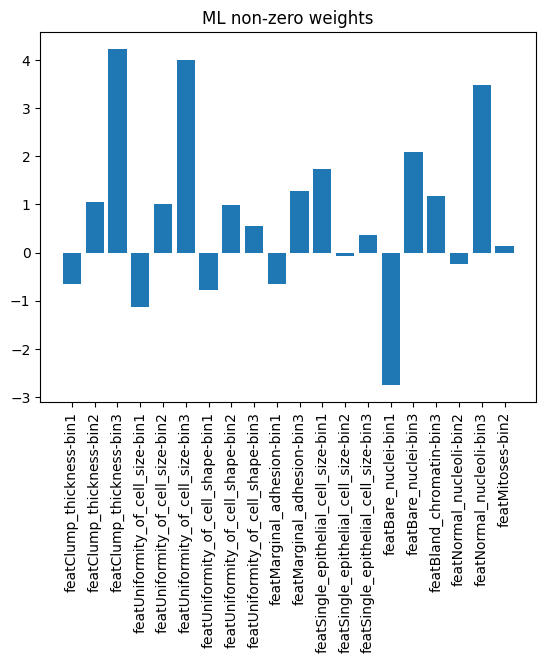


evaluate
encoding test set
X_disc shape:  (171, 27)
X_disc columns:  Index(['featClump_thickness-bin1', 'featClump_thickness-bin2',
       'featClump_thickness-bin3', 'featUniformity_of_cell_size-bin1',
       'featUniformity_of_cell_size-bin2', 'featUniformity_of_cell_size-bin3',
       'featUniformity_of_cell_shape-bin1',
       'featUniformity_of_cell_shape-bin2',
       'featUniformity_of_cell_shape-bin3', 'featMarginal_adhesion-bin1',
       'featMarginal_adhesion-bin2', 'featMarginal_adhesion-bin3',
       'featSingle_epithelial_cell_size-bin1',
       'featSingle_epithelial_cell_size-bin2',
       'featSingle_epithelial_cell_size-bin3', 'featBare_nuclei-bin1',
       'featBare_nuclei-bin2', 'featBare_nuclei-bin3',
       'featBland_chromatin-bin1', 'featBland_chromatin-bin2',
       'featBland_chromatin-bin3', 'featNormal_nucleoli-bin1',
       'featNormal_nucleoli-bin2', 'featNormal_nucleoli-bin3',
       'featMitoses-bin1', 'featMitoses-bin2', 'featMitoses-bin3'],
      dtype

In [4]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_1ook_ml_model, breast_cancer_caim_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [5]:
scorecard.show_scorecard()

                        Feature          Bin    Points
0               Clump_thickness   [1.0, 6.0[ -0.658042
1               Clump_thickness  [6.0, 10.0[  1.041874
2               Clump_thickness  [10.0, inf[  4.225966
3       Uniformity_of_cell_size   [1.0, 3.0[ -1.133842
4       Uniformity_of_cell_size  [3.0, 10.0[  1.013811
5       Uniformity_of_cell_size  [10.0, inf[  3.988853
6      Uniformity_of_cell_shape   [1.0, 3.0[ -0.779735
7      Uniformity_of_cell_shape  [3.0, 10.0[  0.992249
8      Uniformity_of_cell_shape  [10.0, inf[  0.550112
9             Marginal_adhesion   [1.0, 3.0[ -0.643806
10            Marginal_adhesion  [10.0, inf[  1.272319
11  Single_epithelial_cell_size   [1.0, 2.0[  1.728639
12  Single_epithelial_cell_size  [2.0, 10.0[ -0.074859
13  Single_epithelial_cell_size  [10.0, inf[  0.357249
14                  Bare_nuclei   [1.0, 3.0[ -2.746451
15                  Bare_nuclei  [10.0, inf[  2.083450
16              Bland_chromatin  [10.0, inf[  1.185360
17        

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_1ook_ml_model, breast_cancer_infbins_1ook_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_caim_diff_ml_model, breast_cancer_caim_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
breast_cancer_infbins_diff_ml_model, breast_cancer_infbins_diff_ml_weights = scorecard.fit(breast_cancer_X, breast_cancer_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## tic tac toe
classify configurations of tic-tac-toe game as a win for "x" or not


https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame

In [ ]:
# fetch dataset 
tic_tac_toe_data = fetch_ucirepo(id=101) 
  
# data (as pandas dataframes) 
tic_tac_toe_X = tic_tac_toe_data.data.features 
tic_tac_toe_y = tic_tac_toe_data.data.targets 

tic_tac_toe_y.loc[:,'class'] = tic_tac_toe_y['class'].map({'positive': 1, 'negative': 0})
tic_tac_toe_y = tic_tac_toe_y.astype(int)

# remove rows with nulls
tic_tac_toe_combined = pd.concat([tic_tac_toe_X, tic_tac_toe_y], axis=1)
print("num rows with nulls: ", tic_tac_toe_combined.isnull().sum().sum())
tic_tac_toe_combined = tic_tac_toe_combined.dropna().reset_index(drop=True)
tic_tac_toe_X = tic_tac_toe_combined.iloc[:, :-1]
tic_tac_toe_y = tic_tac_toe_combined.iloc[:, -1]

# metadata 
# print(tic_tac_toe_data.metadata) 
  
# variable information 
# print(tic_tac_toe_data.variables) 

print("num observations: ", tic_tac_toe_y.count())
print("num features: ", tic_tac_toe_X.shape[1])
print("target distribution: ", tic_tac_toe_y.value_counts())
tic_tac_toe_y.value_counts().plot(kind='bar')
plt.title('target distribution')
plt.xlabel('tic tac toe')
plt.ylabel('count')
plt.xticks([0, 1], ['negative', 'positive'], rotation=0)
plt.show()

# proportion of positive class
print("Proportion of positive class: ", tic_tac_toe_y.mean())

In [ ]:
categorical_columns = tic_tac_toe_X.select_dtypes(include=['object']).columns.to_list()
print("categorical columns: ", categorical_columns)

# encode categorical columns
for col in categorical_columns:
    tic_tac_toe_X.loc[:, col] = tic_tac_toe_X[col].astype('category').cat.codes.astype('int')
    print(f"Column {col} encoded as: {tic_tac_toe_X[col].unique()}")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_1ook_ml_model, tic_tac_toe_caim_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='1_OUT_OF_K', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_1ook_ml_model, tic_tac_toe_infbins_1ook_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='1_OUT_OF_K', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_caim_diff_ml_model, tic_tac_toe_caim_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='CAIM',
                encoding_method='DIFF_CODING', 
                model_method='ML')
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

In [ ]:
num_nonzero_weights = scorecard.nonzero_weights.shape[0]
print(f'Number of non-zero weights: {num_nonzero_weights}')

In [ ]:
start_time = time.time()

scorecard = Scorecard()
tic_tac_toe_infbins_diff_ml_model, tic_tac_toe_infbins_diff_ml_weights = scorecard.fit(tic_tac_toe_X, tic_tac_toe_y, categorical_columns,
                thresholds_method='INF_BINS',
                encoding_method='DIFF_CODING', 
                model_method='ML',
                use_sbc=False,
                num_nonzero_weights=num_nonzero_weights)
scorecard.evaluate()

end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

## sleep apnea
collection of clinical polysomnography (PSG) recordings. Beginning with PSG recordings from from ~19K patients evaluated at the Massachusetts General Hospital.

https://bdsp.io/content/hsp/2.0/#files

In [ ]:
sleep_apnea_data = pd.read_csv('../datasets/bdsp_psg_master_20231101.csv')

sleep_apnea_X = sleep_apnea_data.iloc[:, :-1]
sleep_apnea_y = sleep_apnea_data.iloc[:, -1]

print("num observations: ", sleep_apnea_y.count())
print("num features: ", sleep_apnea_X.shape[1])